# AN EXAMPLE OF TESLA'S BETA CALCULATION

### Given the known formulas
# $R_{appl}(t) = \alpha + \beta * R_{gspc}(t) + \epsilon (t) $ <br>
# $\beta = \frac{\sigma_{appl,gspc}}{\sigma_{gspc}}$ <br>
### where: <br>
### $R_{tsla}$ :  is the excess return of the stock and $R_{gspc}$ is excess return of the index (here I use S&P500). <br>
### $\beta$ :  is the amount by which the security return tends to increase or decrease for every 1% increase or decrease in the return on the index
### $\alpha$ :  is the stock's outperformance/underperformance compared to the market excess return
### $\epsilon$ :  is the zero-mean, firm-specific surprise in the security return in month t, also called the residual<br>
### NB: To make things simple assume risk free rate = 0 <br>

In [44]:
import yfinance as yf
import mplfinance as mpf

import numpy as np
import pandas as pd

from scipy import stats
from sklearn.linear_model import LinearRegression

# matplotlib & seaborn -> plotting
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Method 1

In [45]:
Apple = yf.Ticker("AAPL")

In [46]:
Apple.info["beta"]

1.203743

### In this way we get beta as YahooFinance calculate it: Yahoo Finance calculates beta from monthly prices over a time of 5 years.

# Method 2

### Using Method 2 we could set any parameter we would like, in this way we could obtain a beta
### Why should someone set its own paramets?  if you visit different providers you could get different betas for the same stock, because each of them calculates the beta in a different way: for example, one provider could use 3-years monthly prices, another one 5-years monthly prices. Even the ‘market’ could have been choosen in a different way. <br>
### Someone could be interest in calculating beta in a different way, for example X year beta, because the investment will be hold for X years. Here is the reason of setting paraments.

In [107]:
df = yf.download(tickers=["AAPL", "^GSPC"], start="2016-04-01", end="2021-06-01", interval="1mo", group_by="ticker")

[*********************100%***********************]  2 of 2 completed


In [110]:
df.dropna(inplace=True)

In [152]:
#return using normal log return
apple = np.log(df["AAPL"]["Adj Close"]) - np.log(df["AAPL"]["Adj Close"].shift(1))
apple = apple.drop(apple.index[0])

gspc = np.log(df["^GSPC"]["Adj Close"]) - np.log(df["^GSPC"]["Adj Close"].shift(1))
gspc = gspc.drop(gspc.index[0])

#return using .pct_change: this method uses the following formulas (Current-Previous/Previous) * 100
apple2 = df["AAPL"]["Adj Close"].pct_change()
apple2 = apple2.drop(apple2.index[0])

gspc2 = df["^GSPC"]["Adj Close"].pct_change()
gspc2 = gspc2.drop(gspc2.index[0])

In [165]:
y = np.array(apple)
y2 = np.array(apple2)

In [166]:
X = np.array(gspc).reshape((-1,1))
X2 = np.array(gspc2).reshape((-1,1))

### LinearRegression using sklearn

In [167]:
lr = LinearRegression().fit(X,y)
lr2 = LinearRegression().fit(X2,y2)

In [168]:
print(lr.coef_ , lr2.coef_)

[1.17786743] [1.20324465]


### the difference we see is due to different formulas to calculate the return

### LinearRegression using scipy

In [172]:
X2_ = X2.reshape((-1,1))
regress_coefs = stats.linregress(gspc2 , apple2)
print(regress_coefs)

LinregressResult(slope=1.2032446549391507, intercept=0.017158476291125015, rvalue=0.6200124658755901, pvalue=9.897031325906491e-08, stderr=0.1982309064004462)


# Method 3

In [157]:
a = df["AAPL"]["Adj Close"].pct_change()
a = a.drop(a.index[0])

g = df["^GSPC"]["Adj Close"].pct_change()
g = g.drop(g.index[0])

cov = a.cov(g) #Y
var = g.var() #X

beta = cov/var

print(beta)

1.2032446549391507


# Graphs

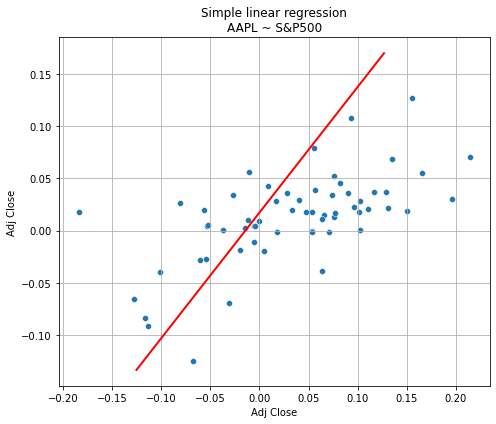

In [160]:
# compute the y values of the linear regression line
y_pred3 = lr3.predict(X3)

title = "Simple linear regression" + "\n" + "AAPL ~ S&P500"

plt.figure(figsize=(7, 6))
plt.title(label=title)
sns.scatterplot(x=t, y=g)
sns.lineplot(x=g, y=y_pred3, linewidth=2, color="red")
plt.grid()
plt.tight_layout()
plt.show()